請擷取近期各大財經媒體頭條新聞至少五則以上，針對此財經新聞進行主題分析。完成主題分析後，請針對各主題之關鍵詞畫出文字雲，說明各主題之主要重點內容。

In [ ]:
!pip install jieba
!pip install gensim

In [6]:
import jieba

train = []
stopwords = open('停用詞-五則財經新聞.txt','r',encoding='utf8').read()
fp = open('五則財經新聞.txt','r',encoding='utf8')
jieba.load_userdict(['賺錢','複製','半導體','美國聯準會','聯準會'])
for words in fp:
  seg=jieba.cut_for_search(words)
  train.append([ word for word in seg if len(word)>1 and word not in stopwords ])
print(train)
print(len(train))

# word = jieba.lcut(fp.read())
# print("/".join(word))

[['2006', '股票', '市場', '中戰', '無不勝', '不克', '攻無不克', '一度', '數千萬', '資產', '自我', '感覺', '當成', '股神', '賺錢', '簡單', '同時', '任性', '毅然', '決然', '辭去', '稱羨', '工作', '華南', '銀行', '鐵飯', '踏上', '從學生', '時代', '之路', '日本', '博士', '希望', '將來', '轉換', '跑道', '大學', '教書'], ['日本', '俗諺', '人生', '三道', '上坡', '坡道', '上坡道', '下坡', '沒想', '日本', '求學', '期間', '經歷', '人生', '致命', '重擊'], ['生長', '南投', '竹山', '鎮鄉', '爸爸', '媽媽', '工人', '能力', '有限', '家裡', '環境', '並不寬裕', '貧窮', '為過', '早就', '賺錢', '欲望'], ['小時候', '工人', '想要', '加薪', '爭得', '面紅耳', '但代書', '父母', '親寫', '幾個', '收到', '幾百塊', '下定', '決心', '好好', '讀書', '將來', '父母', '不用', '工作', '過上', '日子', '好日子'], ['從台', '中商', '專應', '用外', '文科', '日文', '組畢業', '順利', '考上', '郵局', '特考', '工作', '面對', '一成', '工作', '感覺', '實在', '無聊', '心想', '過一輩子', '報考', '金融', '特考', '考進華南', '銀行', '一待', '銀行', '工作', '期間', '持續', '進修', '攻讀', '財務', '金融', '碩士', '並在', '中部', '各大專', '院校', '兼課', '希望', '多些', '收入', '家人', '過上', '日子', '好日子', '1990', '銀行', '工作', '第一年', '第一次', '股市'], ['買進', '未上', '上市', '未上市', '上發', '這家', '公司', '拿出', '萬元', '封閉', '基金', '型基金', '身為', 

In [7]:
from gensim import corpora
from gensim.corpora import Dictionary #用來為每個出現在文本中的單詞分配了一個獨一無二的整數編號
from gensim.models import LdaModel

word_id = corpora.Dictionary(train) #幫單詞分配編號
#print(word_id)
#for number, word_ids in word_id.iteritems():    #顯示詞的編號
  #print(number, word_ids)
word_num = [word_id.doc2bow(text) for text in train ]    #計算詞頻向量bow,(0,3)表編號0之文字出現3次
print(word_num)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(18, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(31, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)], [(9, 1), (10, 1), (55, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1)], [(10, 4), (12, 1), (14, 1), (36, 3), (45, 1), (72, 1), (78, 1), (84, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (9

In [8]:
#LDA模型訓練
lda = LdaModel(corpus=word_num, id2word=word_id, num_topics=3)     #corpus：詞頻向量    
print(lda)  
#LDA模型訓練完成後呈現各主題之所有文詞出現之機率
topics=lda.show_topics(3)
for topic in topics:
  print(topic)

LdaModel(num_terms=983, num_topics=3, decay=0.5, chunksize=2000)
(0, '0.009*"程序" + 0.008*"智慧" + 0.007*"股東" + 0.006*"員工" + 0.006*"利率" + 0.005*"法院" + 0.005*"年終" + 0.005*"行政" + 0.005*"專利" + 0.004*"公司"')
(1, '0.007*"央行" + 0.006*"股市" + 0.006*"市場" + 0.005*"趨勢" + 0.005*"投資" + 0.005*"日本" + 0.004*"銀行" + 0.004*"資金" + 0.004*"美國" + 0.004*"利率"')
(2, '0.008*"央行" + 0.007*"台灣" + 0.007*"工作" + 0.006*"股市" + 0.005*"利率" + 0.005*"成交量" + 0.005*"銀行" + 0.005*"法院" + 0.005*"權值" + 0.004*"重押"')


In [9]:
#文本2屬於各主題之機率
topic_test=lda.get_document_topics(word_num)
print(topic_test[2])

[(0, 0.019199155), (1, 0.0189042), (2, 0.96189666)]


In [10]:
lda.save("LDA_train.model") #將主題模型儲存成LDA_train.model
load_model=LdaModel.load("LDA_train.model")

In [11]:
word = []
weight = []
for index, topic in load_model.show_topics(formatted=False, num_words= 10):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))
    word.append([w[0] for w in topic])
    weight.append([w[1] for w in topic])

Topic: 0 
Words: ['程序', '智慧', '股東', '員工', '利率', '法院', '年終', '行政', '專利', '公司']
Topic: 1 
Words: ['央行', '股市', '市場', '趨勢', '投資', '日本', '銀行', '資金', '美國', '利率']
Topic: 2 
Words: ['央行', '台灣', '工作', '股市', '利率', '成交量', '銀行', '法院', '權值', '重押']


In [15]:
import numpy as np
import random
from PIL import Image 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
sp_mask1 = np.array(Image.open('dog.jpg'))
sp_mask2 = np.array(Image.open('mickey.jpeg'))
sp_mask3 = np.array(Image.open('swallow.jpg'))

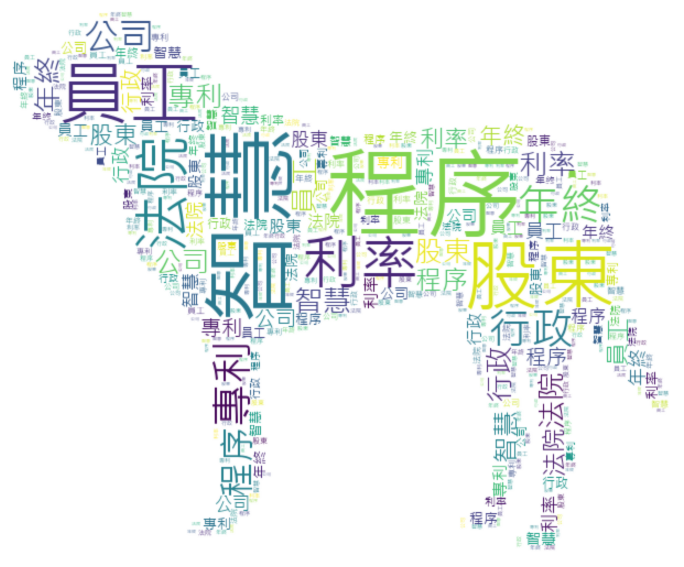

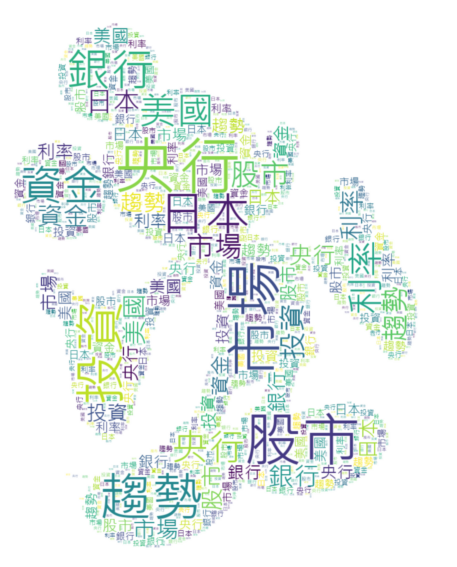

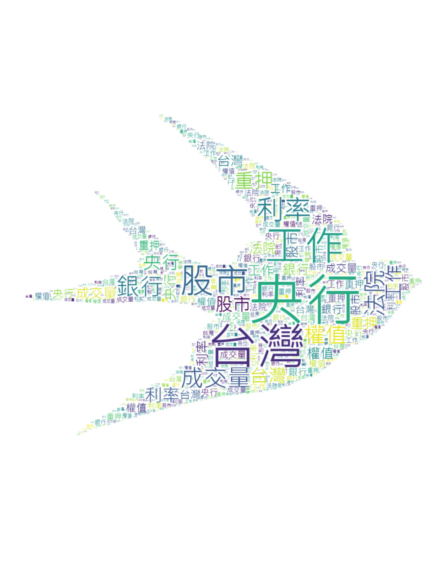

In [16]:
a,b=0,1
for k in range(3):
  new_key = {}
  for i in range(a,b):
    for j in range(10):
      if word[i][j] in new_key:
        if new_key[word[i][j]] > weight[i][j]:
          pass
        elif new_key[word[i][j]] == weight[i][j]:
          pass
        else:
          new_key[word[i][j]] = weight[i][j]
      else:
        new_key[word[i][j]] = weight[i][j] 
  mask=eval("sp_mask"+str(b))
  wc = WordCloud(font_path='WORDTYPE.ttf', repeat=True,background_color="white",max_words=2000, mask=mask,colormap="viridis")

  wc.generate_from_frequencies(new_key)

  plt.figure(figsize=(8,6), dpi=120)  
  plt.imshow(wc, interpolation='gaussian') 
  plt.axis("off")   
  plt.show()
  a+=1
  b+=1

https://tw.stock.yahoo.com/news/%E9%9D%A0%E8%82%A1%E5%B8%82%E8%B3%BA%E5%B9%BE%E5%8D%83%E8%90%AC-39%E6%AD%B2%E5%85%AC%E5%8B%99%E5%93%A1%E8%BE%AD16%E5%B9%B4%E9%90%B5%E9%A3%AF%E7%A2%97-%E6%B2%92%E6%83%B31%E6%AC%A1%E8%9E%8D%E8%B3%87%E9%87%8D%E6%8A%BC%E8%B2%A1%E5%AF%8C-%E5%A4%95%E8%92%B8%E7%99%BC-%E6%B0%B8%E9%81%A0%E4%B8%8D%E8%A6%81%E5%92%8C%E8%B6%A8%E5%8B%A2%E4%BD%9C%E5%B0%8D-032204270.html

https://tw.stock.yahoo.com/news/%E5%A4%AE%E8%A1%8C%E9%82%84%E6%9C%83%E7%B9%BC%E7%BA%8C%E5%8D%87%E6%81%AF-%E6%88%BF%E4%BB%B2-%E8%8B%A5%E5%86%8D%E5%8D%87%E6%81%AF%E5%8D%8A%E7%A2%BC-%E5%8D%83%E8%90%AC%E8%B2%B8%E6%AC%BE-%E5%B9%B4%E5%B0%87%E5%A4%9A%E7%B9%B3-063025356.html

https://tw.stock.yahoo.com/news/%E5%B9%B4%E7%B5%82%E5%85%A9%E6%A8%A3%E6%83%85-%E9%95%B7%E6%A6%AE%E6%B5%B7%E9%81%8B2%E5%B9%B4%E4%B8%8A%E7%9C%8B100%E5%80%8B%E6%9C%88-%E9%80%99%E9%A1%9E%E4%BA%BA%E6%81%90%E5%93%AD%E5%93%AD-052219030.html

https://tw.stock.yahoo.com/news/%E8%B6%85%E5%89%8D%E4%BD%88%E7%BD%B2%E7%B4%85%E5%8C%85%E8%A1%8C%E6%83%85-%E5%B0%B1%E5%BE%9E%E4%B8%8B%E9%80%B1%E9%96%8B%E5%A7%8B-053422390.html

https://tw.stock.yahoo.com/news/patent-act-032834245.html